<img src="dataset-cover.jpg" alt="Alternative text" />

In [2]:
import pandas as pd

wine_data = pd.read_csv("winequality.csv")

wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Exploratory Data Analysis (EDA)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Display summary statistics

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# Display data types and missing values

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


c:\Users\Boris\anaconda3\envs\venv_wine\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Boris\anaconda3\envs\venv_wine\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Wine quality distribution'),
 Text(0.5, 0, 'Wine quality'),
 Text(0, 0.5, 'Count')]

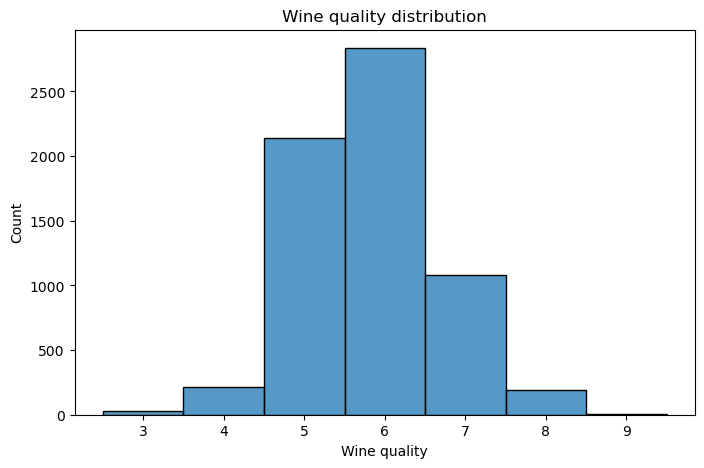

In [11]:
# Plot distribution of the target variable

fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(wine_data["quality"], discrete=True, ax = ax).set(title="Wine quality distribution", xlabel='Wine quality', ylabel='Count') 

<Axes: title={'center': 'Correlation heatmap'}>

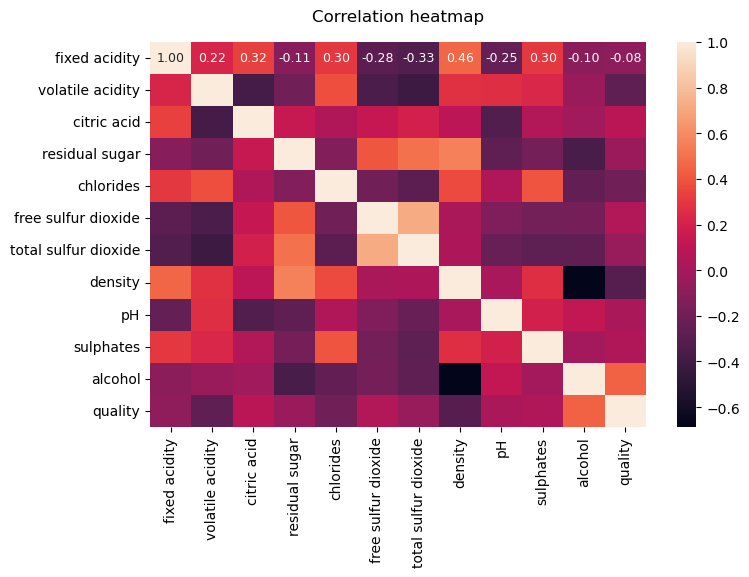

In [7]:
# Create a correlation heatmap

fig, ax = plt.subplots(figsize=(8, 5))

plt.title('Correlation heatmap', pad=15)

sns.heatmap(wine_data.corr(numeric_only=True), annot=True, fmt=".2f", annot_kws={"fontsize":9}, ax = ax)

# Model Development

In [29]:
# Handle null data

wine_data_numeric = wine_data.select_dtypes(include = 'number')
wine_data_numeric = wine_data_numeric.fillna(wine_data_numeric.mean())

wine_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [32]:
# Split the data into features and target variable

y = wine_data_numeric['quality']
X = wine_data_numeric.drop('quality', axis=1)

print(f'Features shape: {X.shape} \n Target shape: {y.shape}')

Features shape: (6497, 11) 
 Target shape: (6497,)


In [44]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_data_train = scaler.fit_transform(X_train)
y_data_train = y_train.to_numpy()

In [48]:
# Initialize the model (Logistic Regression)

model = LogisticRegression(max_iter = 200)

model.fit(X_data_train, y_data_train)

LogisticRegression(max_iter=200)

## Model Output & Evaluation

In [52]:
# Predictions on the test set

scaler = StandardScaler()

X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

y_predict = model.predict(X_data_test)

In [57]:
# Model accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_predict)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.54


In [56]:
# Confusion matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)


 Confusion Matrix:

[[  0   0   2   0   0   0]
 [  0   1  30  15   0   0]
 [  0   0 257 162   1   0]
 [  0   0 139 395  45   0]
 [  0   0  14 164  43   0]
 [  0   0   0  21  11   0]]


In [59]:
# Classification Report

classification_report = classification_report(y_test, y_predict, zero_division=0.0)
print(classification_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.02      0.04        46
           5       0.58      0.61      0.60       420
           6       0.52      0.68      0.59       579
           7       0.43      0.19      0.27       221
           8       0.00      0.00      0.00        32

    accuracy                           0.54      1300
   macro avg       0.42      0.25      0.25      1300
weighted avg       0.53      0.54      0.50      1300



## Alcohol % vs. Quality Relationship

c:\Users\Boris\anaconda3\envs\venv_wine\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Boris\anaconda3\envs\venv_wine\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Boris\anaconda3\envs\venv_wine\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Boris\anaconda3\envs\venv_wine\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

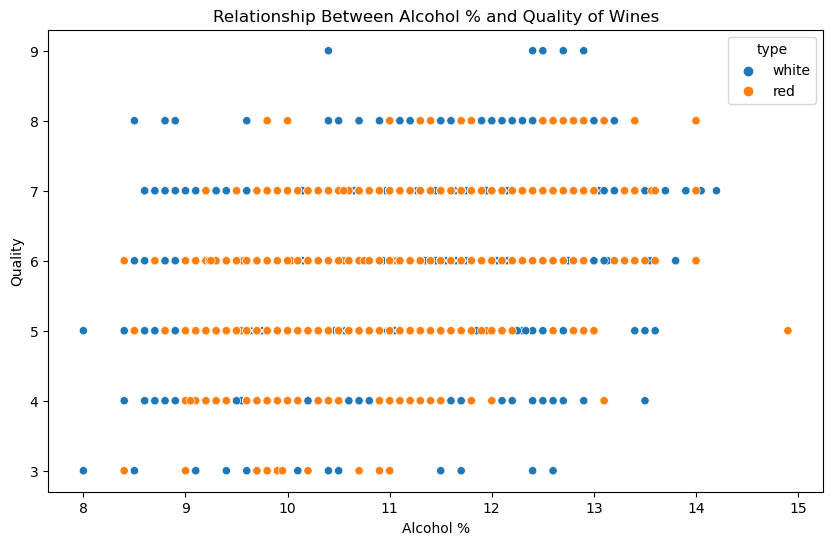

Correlation Coefficient: 0.44


In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=wine_data, hue = 'type')
plt.title('Relationship Between Alcohol % and Quality of Wines')
plt.xlabel('Alcohol %')
plt.ylabel('Quality')
plt.show()

# Calculate the correlation coefficients, and print the output, rounded to the 2nd decimal (HINT: You can double check your answer in the correlation coefficient from your earlier answer)
correlation_coefficient = wine_data['alcohol'].corr(wine_data['quality'])
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')